# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - O espaço de cores RGB é amplamente utilizado pois é o mais intuitivo para seres humanos

In [ ]:
# Verdadeiro

2 - Imagens vetoriais apresentam serrilhamento quando são ampliadas

In [ ]:
'''
    Falso, as imagens vetoriais são feitas justamente para que não ocorra o serrilhamento
    já que elas são definidas por fórmulas matemáticas
'''

3 - A lógica XOR aplicada em uma imagem detecta os pixels que mudaram de valor

In [ ]:
'''
    Falso. Pra detecar mudança de valor, utiliza-se da subtração
'''

4 - O código abaixo representa um circulo com 110px de altura, 128px de largura e rotacionado em 64 graus.

```<circle cx='110' cy='128' r='64' fill='red'/>```

In [ ]:
'''
    Falso. Circulo com centro em (110, 128) e raio 64
'''

5 - Algumas imagens podem ter um quarto canal chamado Alpha que representa a opacidade do pixel

In [ ]:
'''
    Verdadeiro
'''

# Parte prática

## Material de apoio

### Importações

```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

### Escalonamento com nearest neighbor

```
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```

### Cisalhamento

```
img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = int(j + cx * i)
        new_y = int(cy * j + i)
        
        img_shear[new_y, new_x] = img[i, j]
```

### Imagem grayscale para imagem binária de 3 canais

``` 
bin = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
for i in range(l):
    for j in range(c):
        if img[i,j] > thresh: 
            bin[i,j,:] = 255 
        else: 
            bin[i,j,:] = 0

```

**1 -** Importe as bibliotecas que serão usadas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 

**2 -** Abra as imagens horse.jpg e landscape.png, retire o canal alpha se necessário, exiba essas imagens e mostre o formato de cada uma

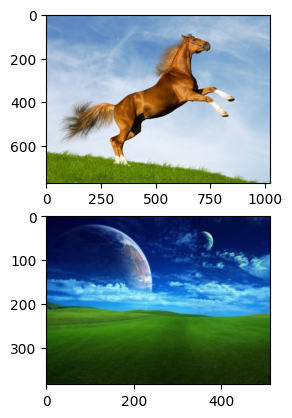

In [12]:
horse = np.array(Image.open('horse.jpg'))[:,:,:3]
landscape = np.array(Image.open('landscape.jpg'))[:,:,:3]

plt.subplot(2,1,1)
plt.imshow(horse)
plt.subplot(2,1,2)
plt.imshow(landscape)

**3 -** Crie uma função que realize o escalonamento de uma imagem que receba como parâmetro uma **imagem, sx e sy**, sendo sx e sy os fatores de escalonamento e **retorne a imagem escalonada**, em seguida aplique o escalonamento na imagem "landscape" para que fique do mesmo tamanho da imagem "horse". Exiba o resultado.

(384, 512, 3)
(768, 1024, 3)
(384, 512, 3)
(768, 1024, 3)


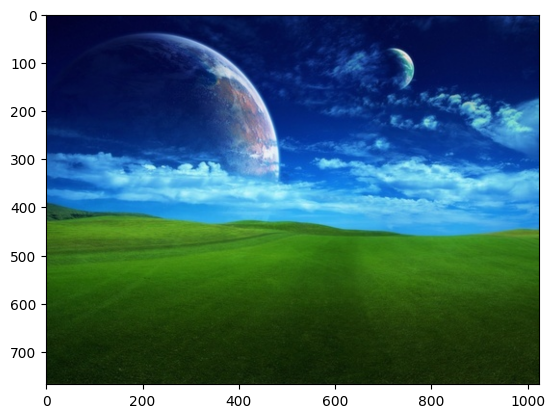

In [72]:
def escalonamento(img:np.ndarray, sx, sy):
    (l,c,p) = img.shape
    
    ls, cs = int(l * sy), int(c * sx)

    newimg = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

    print(img.shape)
    print(newimg.shape)
    print(landscape.shape)
    print(horse.shape)
    for i in range(ls):
        for j in range(cs):
            new_y = int(np.floor(i * (l / ls)))
            new_x = int(np.floor(j * (c / cs)))
            
            newimg[i, j] = img[new_y, new_x]

    return newimg



escalonado = escalonamento(landscape, 2, 2)

plt.imshow(escalonado)



**4 -** Crie uma função para aplicar um método grayscale de sua escolha, que receba como **parâmetro uma imagem e retorne uma imagem em greyscale**. Aplique essa função na **imagem "horse"** e mostre o resultado.

In [91]:
def grayscale(img:np.ndarray):
    (l,c,p) = img.shape 
    newimg = np.zeros(shape=(l,c), dtype=np.uint8)

    for i in range(l):
        for j in range(c):
            r = float(img[i, j, 0])
            g = float(img[i, j, 1])
            b = float(img[i, j, 2])
            newimg[i, j] = (r + g + b) / 3
    
    return newimg


horse_gs = grayscale(horse).astype(np.uint8)
landscape_gs = grayscale(landscape).astype(np.uint8)


**5 -** Crie uma função para transformar uma imagem grayscale em uma imagem binária, que receba como **parâmetro uma imagem e o threshhold** para realizar a operação e retorne uma imagem binária. Aplique essa função na imagem resultante da **etapa anterior com threshold de valor 135** e mostre o resultado.

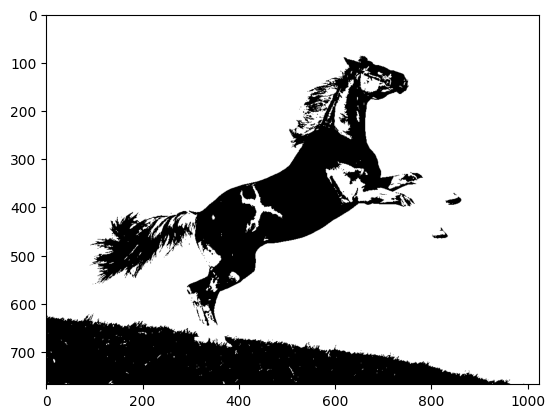

In [94]:
def thres(img, thres):
    (l,c)=img.shape

    newimg = np.zeros(shape=(l,c,3), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            if(img[i,j] >= thres):
                newimg[i,j,:] = 255
            else:
                newimg[i,j,:] = 0
    
    return newimg

landscape_thres = thres(landscape_gs, 200)
horse_thres = thres(horse_gs, 120)

plt.imshow(horse_thres, cmap='gray')

**6 -** Realize a operação NOT com a imagem da **etapa anterior** e mostre o resultado

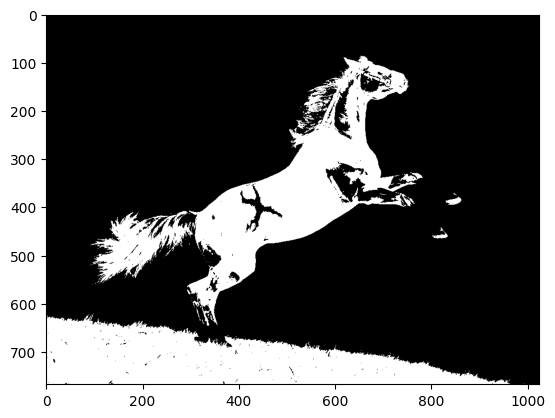

In [95]:
not_landscape_thres = np.bitwise_not(landscape_thres)
not_horse_thres = np.bitwise_not(horse_thres)
plt.imshow(not_horse_thres, cmap='gray')

**7 -** Aplique a imagem da **questão anterior como uma máscara (Lógica E) com a imagem resultante do escalonamento na questão 3**. Mostre o resultado

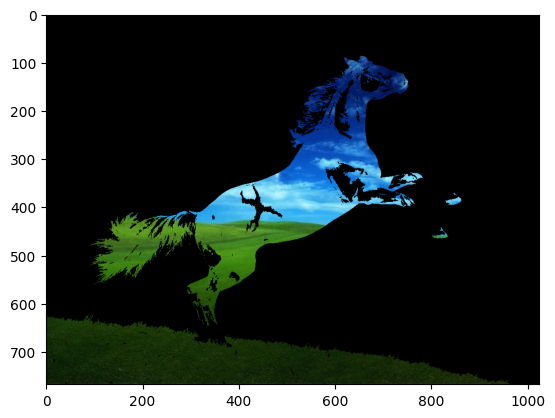

In [97]:
horse_and = (
    not_horse_thres & escalonado
)

plt.imshow(horse_and, cmap='gray')

**8 -** Crie uma função para aplicar o cisalhamento em cima de uma imagem, que **recebe como parâmetro uma imagem, cx e cy**, sendo cx e cy os coeficientes do cisalhamento e retorne a imagem com o efeito aplicado. 
**Aplique a função na imagem anterior com cx=0.3 e cy=0.2**. Mostre o resultado.

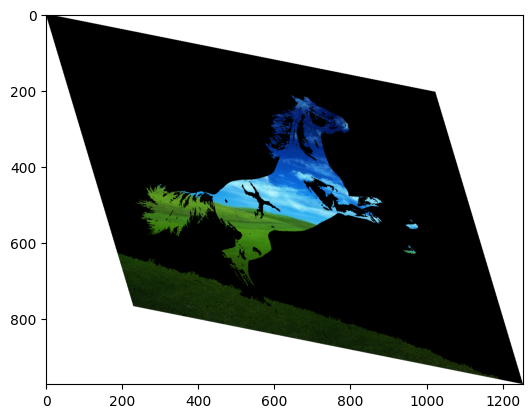

In [104]:
def cisalhamento(img:np.ndarray, cx, cy):
    (l, c, p) = img.shape 
    img_shear = np.ones(
        (
            int(cy * c + l),
            int(c + cx * l),
            p
        ), 
        dtype=np.uint8
    ) * 255

    for i in range(l):
        for j in range(c):
            newx = int(j + cx * i)
            newy = int(cy * j + i)
            img_shear[newy, newx] = img[i,j]
    return img_shear

cisalhado = cisalhamento(horse_and, 0.3, 0.2).astype(np.uint8)
plt.imshow(cisalhamento(horse_and, 0.3, 0.2).astype(np.uint8))

**9 -** Salve a imagem da questão anterior no disco com o nome "resultado.jpg"

In [105]:
cisalhado_img = Image.fromarray(cisalhado)
cisalhado_img.save('cisalhado.png')